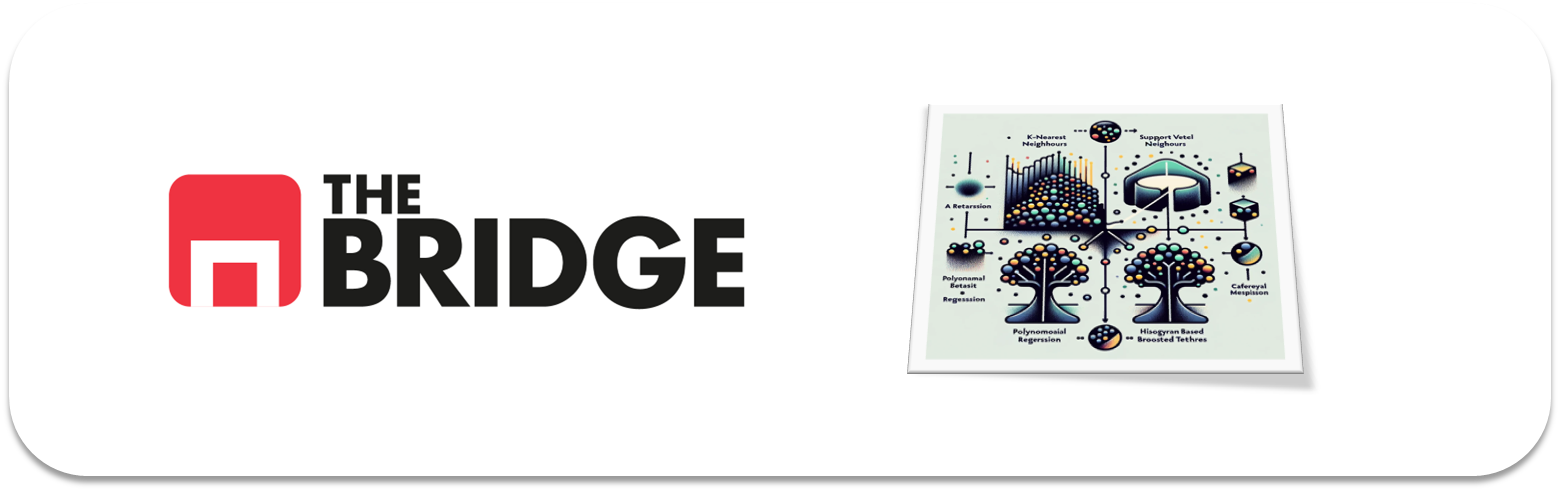

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import toolbox_martin as tbm

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import ConfusionMatrixDisplay,balanced_accuracy_score, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes encontrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [3]:
df=pd.read_csv("./data/credit_npo.csv")
df.head(20)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [5]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [6]:
# columnas con nulos
nulos=[]
for col in df.columns:
    if df[col].isna().any():
        nulos.append(col)
print(nulos)


['MonthlyIncome', 'NumberOfDependents']


In [7]:
# analisis del conjunto 
analisis=tbm.analizar_df(df)
analisis

,Columna,Tipo,Cardinalidad,% Cardinalidad,Numero de nulos,% Nulos
0,SeriousDlqin2yrs,int64,2,0.015953,0,0.000000
1,RevolvingUtilizationOfUnsecuredLines,float64,10764,85.857861,0,0.000000
2,age,int64,78,0.622158,0,0.000000
3,NumberOfTime30-59DaysPastDueNotWorse,int64,10,0.079764,0,0.000000
4,DebtRatio,float64,11547,92.103374,0,0.000000
5,MonthlyIncome,float64,4167,33.237617,721,5.750977
6,NumberOfOpenCreditLinesAndLoans,int64,43,0.342985,0,0.000000
7,NumberOfTimes90DaysLate,int64,13,0.103693,0,0.000000
8,NumberRealEstateLoansOrLines,int64,16,0.127622,0,0.000000
9,NumberOfTime60-89DaysPastDueNotWorse,int64,8,0.063811,0,0.000000


In [8]:
df["NumberOfDependents"].value_counts()

NumberOfDependents
0.0     6935
1.0     2384
2.0     1816
3.0      882
4.0      253
5.0       62
6.0       24
8.0        2
10.0       1
7.0        1
Name: count, dtype: int64

In [9]:
# el % de nulos es muy bajo en ambos casos.
# eliminamos las filas de ambos casos, aunque podria meter la moda/media

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [12]:
# Se podria llegar a cambiar el tipo de las columnas con baja cardinalidad a categoricas, pero lo vamos a dejar asi

In [13]:
col_card_menor10=analisis[analisis["Cardinalidad"]<=10]["Columna"].to_list()
col_card_menor10

['SeriousDlqin2yrs',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

####  INFORMACION DE VARIABLES


|Variable |Tipo |Descripción |
|-|-|-|
|SeriousDlqin2yrs |Binario|Cliente clasificado como moroso por haber excedido 90 días o más de impagos. 
|RevolvingUtilizationOfUnsecuredLines |Numerica Continua |Ratio que relaciona el balance de la cuenta de crédito abierta con el límite de crédito establecido.| 
|Age |Numerica Continua|Edad del cliente. |
|NumberOfTime3059DaysPastDueNotWorse |Numerica Discreta |Número de veces que el cliente se ha retrasado en el pago de 30 a 59 días, pero su posición no ha empeorado en los últimos dos años.| 
|DebtRatio |Numerica Continua|Ratio que relaciona los gastos mensuales (amortización de la deuda y consumo diario) con los ingresos. |
|MonthlyIncome |Numerica Continua |Ingresos mensuales.| 
|NumberOfOpenCreditLinesAndLoans |Numerica Discreta |Número de líneas de crédito y préstamos abiertos.|
|NumberOfTimes90DaysLate |Numerica Discreta|Número de veces que el cliente se ha retrasado en el pago 90 días o más.|  
|NumberRealEstateLoansOrLines |Numerica Discreta|Número de préstamos hipotecarios e inmobiliarios, incluidas líneas de crédito con garantía hipotecaria.|
|NumberOfTime6089DaysPastDueNotWorse |Numerica Discreta|Número de veces que el cliente se ha retrasado en el pago de 30 a 59 días, pero su posición no ha empeorado en los últimos dos años.| 
|NumberOfDependents |Numerica Discreta |Número de miembros de la familia del cliente (excluyéndose ellos mismos). |


Las variables con cardinalidad menor o igual que 10 se podrian considerar como categoricas:``'SeriousDlqin2yrs',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents'``

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Estamos tratando con un tipo de problema de clasificación (Binario) donde la target es la variable ``SeriousDlqin2yrs``

In [14]:
target="SeriousDlqin2yrs"

### #1.3
Pinta la distribución de frecuencias del target y coméntala

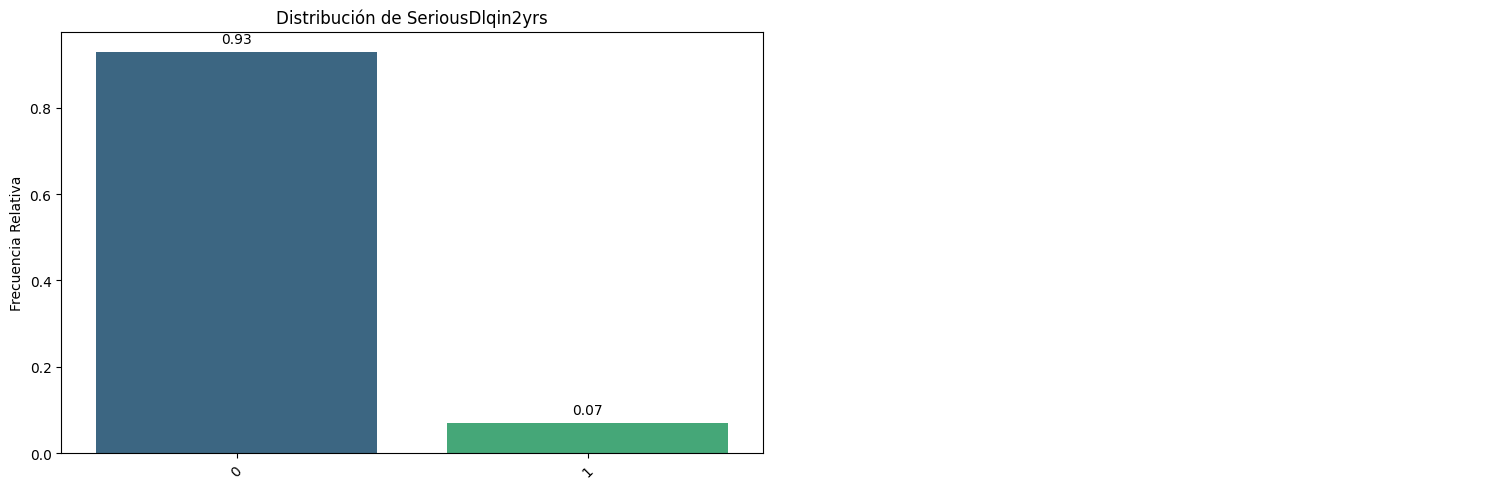

In [15]:
bt.pinta_distribucion_categoricas(df,[target],True,True)

Es una distribucion claramente desbalanceada donde no predomina el 1 (clientes con morosidad)

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [16]:
#train/test

train_set, test_set=train_test_split(df,test_size=0.2, random_state=42)
X_train = train_set.drop(target, axis=1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]


#### MINIEDA

In [17]:
#features, los divido en 2 partes para ver mejor el pairplot
features_num=train_set.columns.drop("SeriousDlqin2yrs").tolist()
features_num_1=features_num[:5]
features_num_2=features_num[5:]

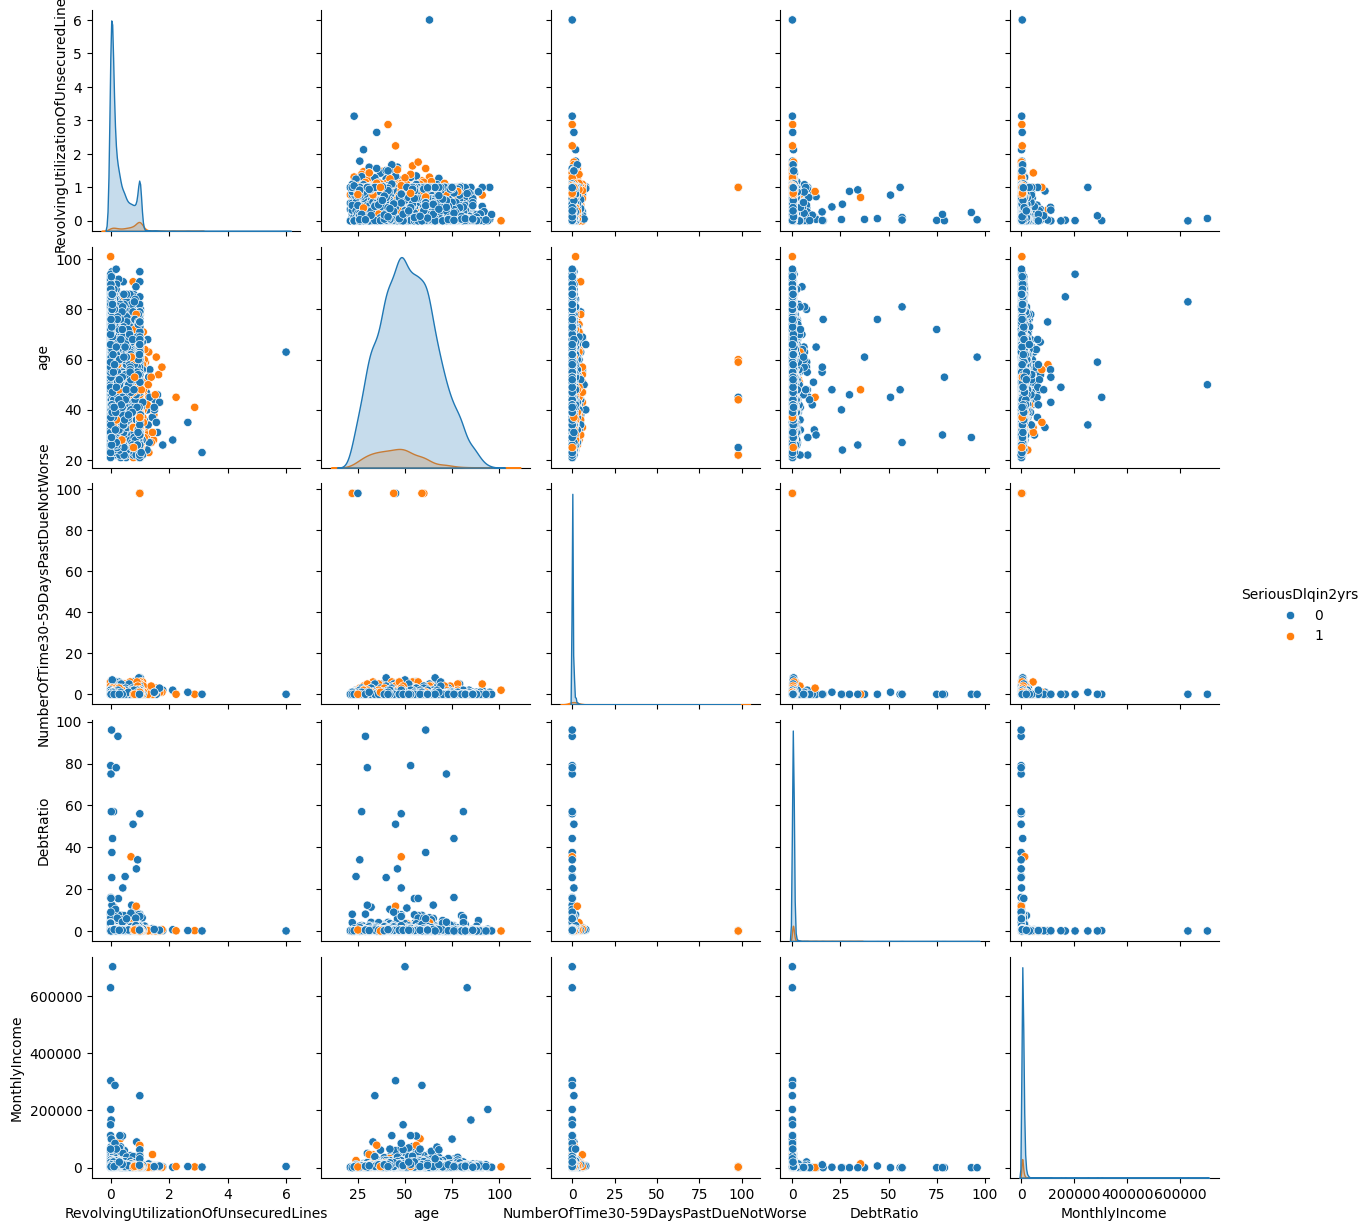

In [18]:
# pairplot
sns.pairplot(train_set[features_num_1 + [target]], hue = target)

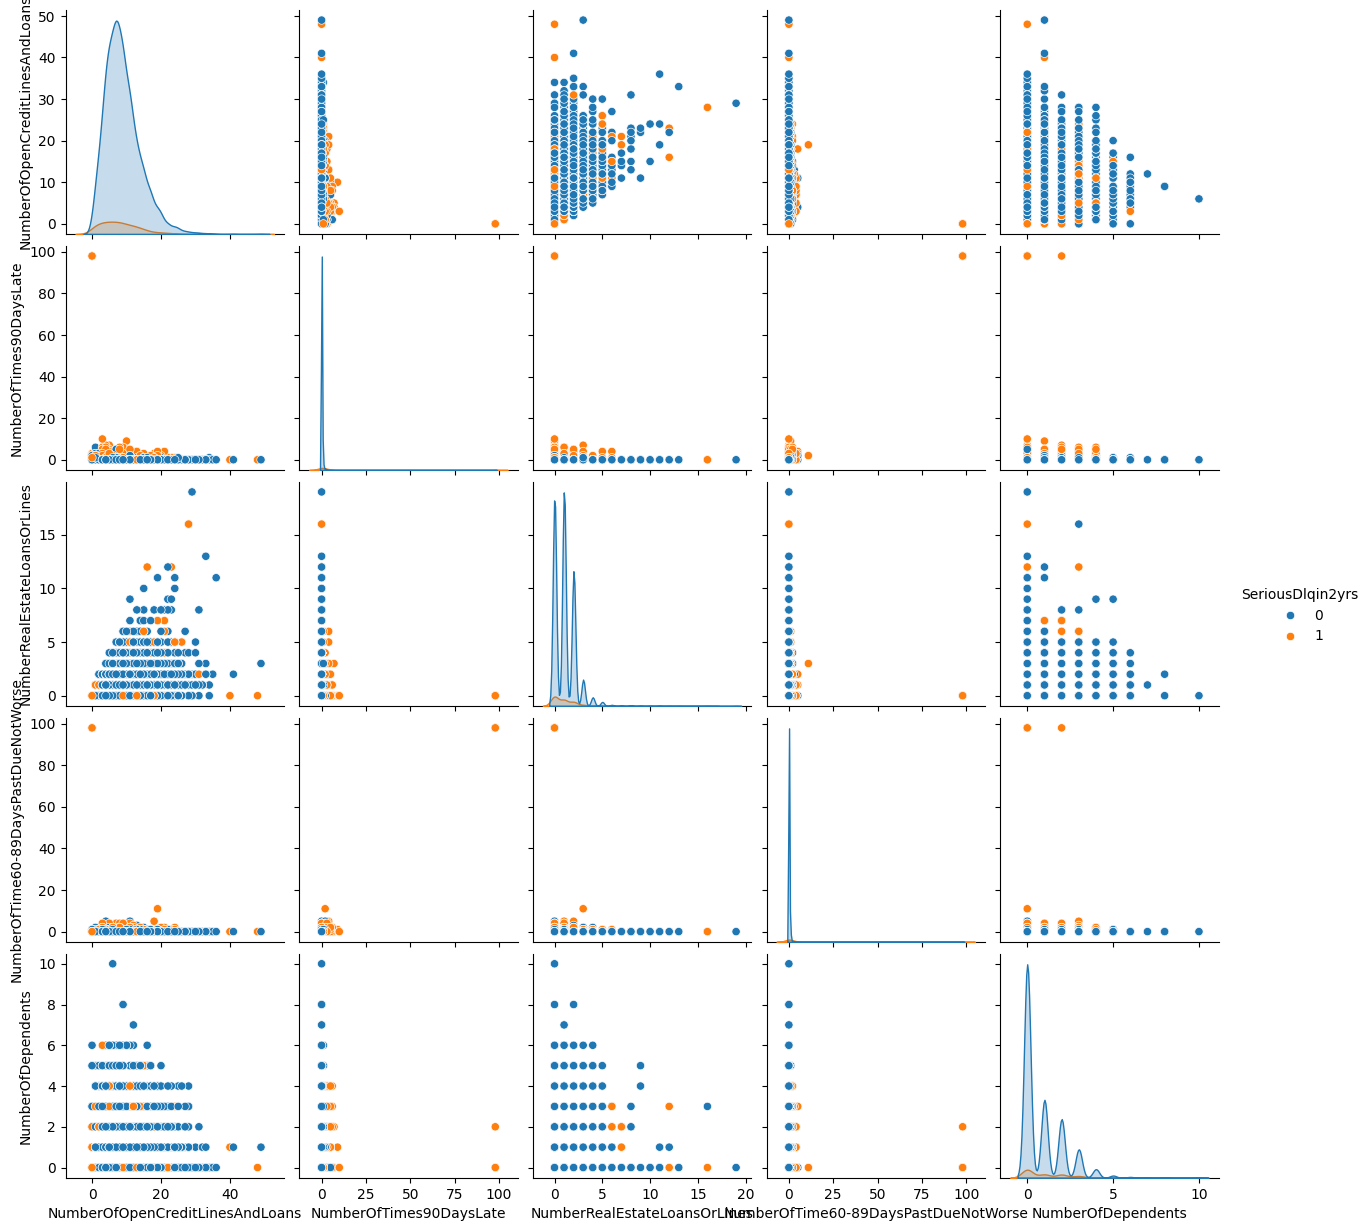

In [19]:
sns.pairplot(train_set[features_num_2 + [target]], hue = target)

Se aprecian valores de outliers que pueden suponer problemas a la hora de modelar, vamos a intentar buscarlos y eliminarlos (o guardarlos si son muchos).

En principio me quedo con todas las columnas, no descartaria ninguna

In [20]:
for col in train_set.columns:
    print(f"Para la columna {col}:")
    tbm.outliers(df, col)
    print("***")


Para la columna SeriousDlqin2yrs:
Lim. Superior: 0.0, Lim. Inferior: 0.0.
Numero de datos por encima: 830, numero de datos por debajo: 0.
Numero de datos fuera de límites: 830
***
Para la columna RevolvingUtilizationOfUnsecuredLines:
Lim. Superior: 1.42, Lim. Inferior: -0.79.
Numero de datos por encima: 36, numero de datos por debajo: 0.
Numero de datos fuera de límites: 36
***
Para la columna age:
Lim. Superior: 93.5, Lim. Inferior: 9.5.
Numero de datos por encima: 8, numero de datos por debajo: 0.
Numero de datos fuera de límites: 8
***
Para la columna NumberOfTime30-59DaysPastDueNotWorse:
Lim. Superior: 0.0, Lim. Inferior: 0.0.
Numero de datos por encima: 1998, numero de datos por debajo: 0.
Numero de datos fuera de límites: 1998
***
Para la columna DebtRatio:
Lim. Superior: 0.98, Lim. Inferior: -0.36.
Numero de datos por encima: 576, numero de datos por debajo: 0.
Numero de datos fuera de límites: 576
***
Para la columna MonthlyIncome:
Lim. Superior: 15501.88, Lim. Inferior: -3703.

In [21]:
#forma del train set
train_set.shape

(9452, 11)

In [22]:
for col in train_set.columns:
    train_set_out = tbm.remove_outliers(train_set, col, k=1.5)

In [23]:
train_set_out.shape

(9429, 11)

#### Transformacion

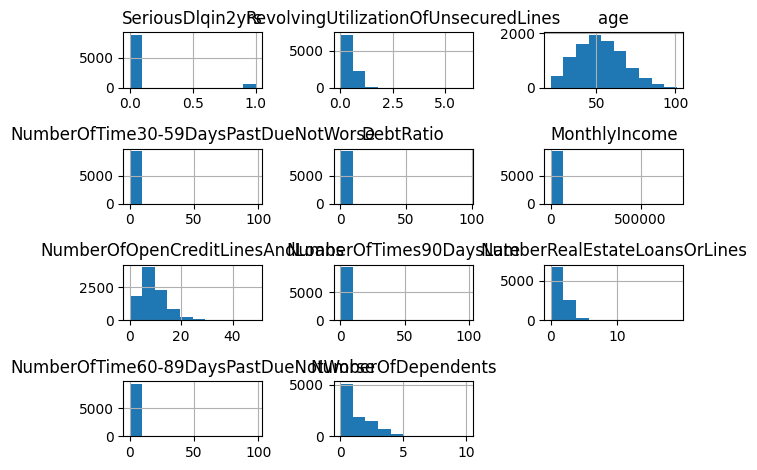

In [37]:
# todas nuestras columnas son numericas
train_set.hist()
plt.tight_layout()
plt.show()

En general voy a tener que estandarizar todos los parametros y en algunos aplicar alguna transformacion

* Vamos a empezar transformando nuestro test como train_set_out para quitar outliers
* Nuestras variables numericas de larga cola van a a recibir una transformacion cuadradica, la raiz cuadrada
* vamos a aplicar una estandarizacion

In [24]:
# train_set_out
for col in test_set.columns:
    test_set_out = tbm.remove_outliers(test_set, col, k=1.5)

In [25]:
# transformacion larga cola
feat_lc = features_num.copy()
feat_lc.remove('RevolvingUtilizationOfUnsecuredLines')
feat_lc.remove('age')
feat_lc

['NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [32]:
for col in feat_lc:
    train_set_out[col]=np.sqrt(train_set_out[col])
    test_set_out[col]=np.sqrt(test_set_out[col])


C:\Users\Martín Ámez Segovia\AppData\Local\Temp\ipykernel_11872\2093673605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set_out[col]=np.sqrt(train_set_out[col])
C:\Users\Martín Ámez Segovia\AppData\Local\Temp\ipykernel_11872\2093673605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set_out[col]=np.sqrt(test_set_out[col])


In [35]:
#Estandarizacion
scaler = StandardScaler()
train_set_out[features_num] = scaler.fit_transform(train_set_out[features_num])
test_set_out[features_num] = scaler.transform(test_set_out[features_num])


C:\Users\Martín Ámez Segovia\AppData\Local\Temp\ipykernel_11872\3819193765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set_out[features_num] = scaler.fit_transform(train_set_out[features_num])
C:\Users\Martín Ámez Segovia\AppData\Local\Temp\ipykernel_11872\3819193765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set_out[features_num] = scaler.transform(test_set_out[features_num])


In [36]:
train_set_out.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,9429.000000,9.429000e+03,9.429000e+03,9.429000e+03,9.429000e+03,9.429000e+03,9.429000e+03,9.429000e+03,9.429000e+03,9.429000e+03,9.429000e+03
mean,0.070209,1.006018e-16,-8.553039e-17,-5.651788e-17,1.910304e-16,1.582501e-17,3.443823e-16,-1.243393e-17,-2.562144e-17,6.782145e-18,1.160500e-16
std,0.255512,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00
min,0.000000,-9.247077e-01,-2.102946e+00,-3.834499e-01,-1.335848e+00,-2.461523e+00,-3.196550e+00,-1.884049e-01,-1.234753e+00,-1.738993e-01,-8.681321e-01
25%,0.000000,-8.286992e-01,-7.243989e-01,-3.834499e-01,-4.209129e-01,-5.735216e-01,-6.715230e-01,-1.884049e-01,-1.234753e+00,-1.738993e-01,-8.681321e-01
50%,0.000000,-4.309008e-01,-3.512525e-02,-3.834499e-01,-3.072647e-02,-9.739731e-02,-2.615410e-03,-1.884049e-01,3.052744e-01,-1.738993e-01,-8.681321e-01
75%,0.000000,6.953493e-01,7.230758e-01,-3.834499e-01,3.183237e-01,4.605413e-01,5.486703e-01,-1.884049e-01,9.431745e-01,-1.738993e-01,1.163266e+00
max,1.000000,1.563857e+01,3.411243e+00,1.770613e+01,2.210434e+01,2.442124e+01,4.708035e+00,2.352208e+01,5.478070e+00,2.550235e+01,2.343790e+00


#### 1 Random Forest sin transformaciones

In [38]:
# Random Forest
rf_clf = RandomForestClassifier(max_depth= 5, random_state= 42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [39]:
y_pred=rf_clf.predict(X_train)

In [40]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8789
           1       0.89      0.18      0.30       663

    accuracy                           0.94      9452
   macro avg       0.91      0.59      0.63      9452
weighted avg       0.94      0.94      0.92      9452



Nuestro modelo de primeras presenta un mal porcentaje en el recall 1 que es el que nos interesa

#### 2 Random Forest con transformaciones

In [41]:
X_train = train_set_out.drop(target, axis=1)
y_train = train_set_out[target]
X_test = test_set_out.drop(target, axis = 1)
y_test = test_set_out[target]

In [42]:
# Random Forest 2
rf_clf = RandomForestClassifier(max_depth= 5, random_state= 42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [43]:
y_pred=rf_clf.predict(X_train)

In [44]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8767
           1       0.87      0.19      0.32       662

    accuracy                           0.94      9429
   macro avg       0.91      0.60      0.64      9429
weighted avg       0.94      0.94      0.92      9429



En principio, los outlier que se quitaron y las transformaciones, mejorar un poco el recall, a costa de perder precision

#### MODELADO con KNN, RANDOMFOREST y XGB

In [58]:
#modelos
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(max_depth= 5, random_state= 42)
xgb_model = XGBClassifier(max_depth= 5, random_state= 42)

models = [knn_model, rf_model, xgb_model]

In [59]:
# Con una metrica tan desequilibrada haremos el cross validation utilizando balance_accuracy
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='balanced_accuracy')
    print(f'{model.__class__.__name__} Recall medio: {scores.mean()}')

KNeighborsClassifier Recall medio: 0.5793535314132005
RandomForestClassifier Recall medio: 0.5590940191053143
XGBClassifier Recall medio: 0.599493760820504


In [60]:
#Entrenamiento
for model in models:
    model.fit(X_train, y_train)

In [61]:
def metricas(model,X, y_target):
    y_pred = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y_target, y_pred)
    print(classification_report(y_target, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8767
           1       0.71      0.28      0.40       662

    accuracy                           0.94      9429
   macro avg       0.83      0.63      0.68      9429
weighted avg       0.93      0.94      0.93      9429

************************************************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8767
           1       0.87      0.19      0.32       662

    accuracy                           0.94      9429
   macro avg       0.91      0.60      0.64      9429
weighted avg       0.94      0.94      0.92      9429

************************************************************
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8767
           1       0.98      0.59      0.74       662

    accuracy                           0.97      9429
   mac

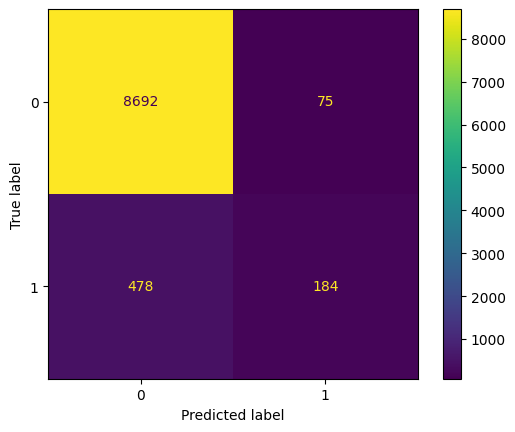

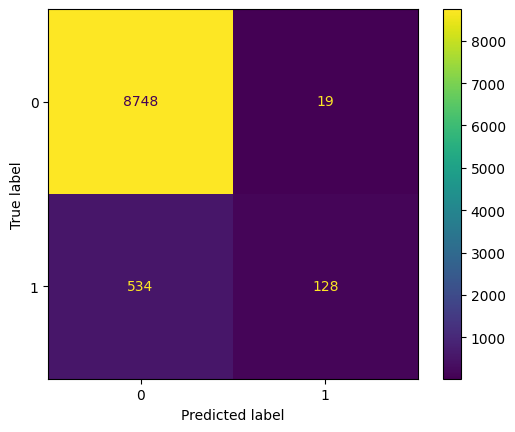

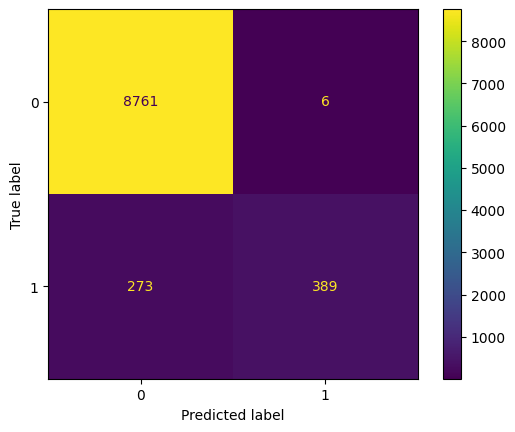

In [64]:
for model in models:
    metricas(model,X_train,y_train)
    print("*"*60)

De primeras con el cv parece que gana XGB, vamos a buscar los mejores parametros para cada una y a ver que sale.

In [66]:
# Optimización de hiperparámetros para KNN
knn_params = {
'n_neighbors': [11, 15, 21, 25,31],
'weights':["uniform","distance"]}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='balanced_accuracy')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

# Optimización de hiperparámetros para RandomForest
rf_params = {
'n_estimators': [50, 100, 200],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4], 
'max_depth': [3, 5, 7]}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='balanced_accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Optimización de hiperparámetros para XGBoost

xgb_params = {
'n_estimators': [50, 100, 200],
'learning_rate': [0.5, 0.8],
'subsample': [0.8, 0.9, 1.0], 
'max_depth': [3, 5, 7]}

xgb_grid = GridSearchCV(XGBClassifier(random_state=42), xgb_params, cv=5, scoring='balanced_accuracy')
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8767
           1       0.71      0.28      0.40       662

    accuracy                           0.94      9429
   macro avg       0.83      0.63      0.68      9429
weighted avg       0.93      0.94      0.93      9429

************************************************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8767
           1       0.87      0.19      0.32       662

    accuracy                           0.94      9429
   macro avg       0.91      0.60      0.64      9429
weighted avg       0.94      0.94      0.92      9429

************************************************************
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8767
           1       0.98      0.59      0.74       662

    accuracy                           0.97      9429
   mac

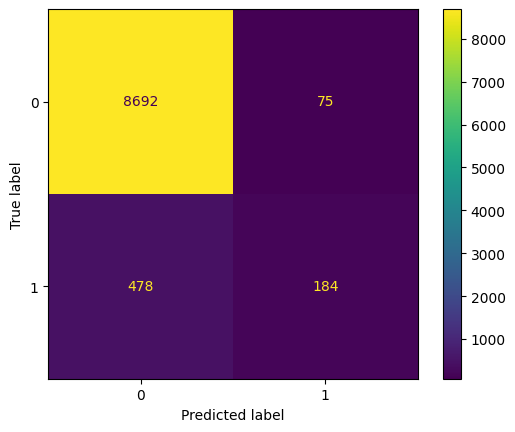

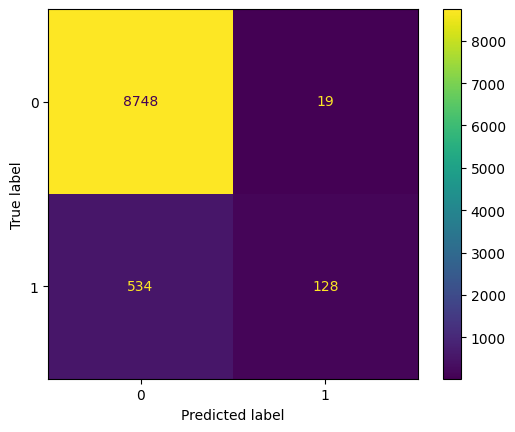

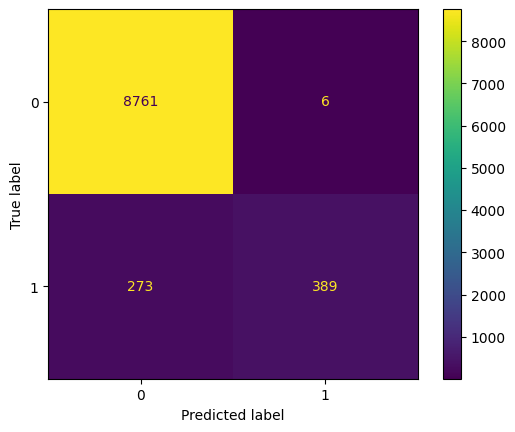

In [68]:
best_models=[best_knn,best_rf,best_xgb]
for model in models:
    metricas(model,X_train,y_train)
    print("*"*60)

    

Con XGB conseguimos la mayor recall av (0.79) seguido de KNN y RndForest

#### ANALISIS DE ERRORES

In [70]:
#best_xgb.best_params_      enxgb se llama de otra manera

AttributeError: 'XGBClassifier' object has no attribute 'best_params_'

In [ ]:
xgb_params = {
'n_estimators': [50, 100, 200],
'learning_rate': [0.5, 0.8],
'subsample': [0.8, 0.9, 1.0], 
'max_depth': [3, 5, 7]}

In [71]:
best_xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.8,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 50,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [74]:
#best_xgb y su prediccion
xgb= XGBClassifier(max_depth= 5, n_estimators=50, learning_rate=0.8, subsample=0.8, random_state= 42)
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)

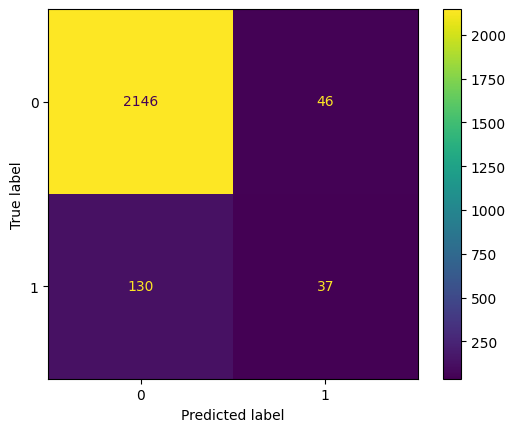

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred) # normalize a true muestra el recall

Las conclusiones no se interpretarlas...